In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from nilmtk import DataSet
from nilmtk.utils import print_dict

In [3]:
data = DataSet('./iAWE.h5')

In [4]:
data = data.buildings[1].elec

In [5]:
df = next(data.mains().load())

Loading data for meter ElecMeterID(instance=2, building=1, dataset='iAWE')     
Done loading data all meters for this chunk.


<AxesSubplot:>

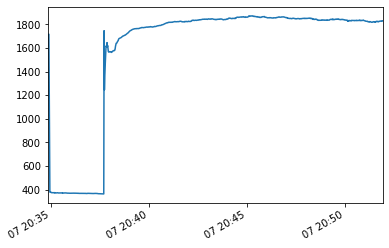

In [6]:
a = next(data['air conditioner'].load())[('power','active')][:1024]
j = a.to_numpy()
a.plot()

<AxesSubplot:>

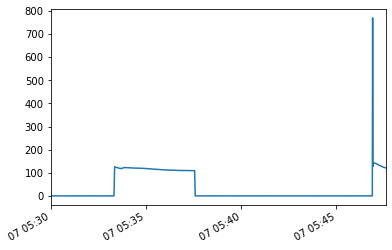

In [7]:
b = next(data['fridge'].load())[('power','active')][:1024]
k = b.to_numpy()
b.plot()

<AxesSubplot:>

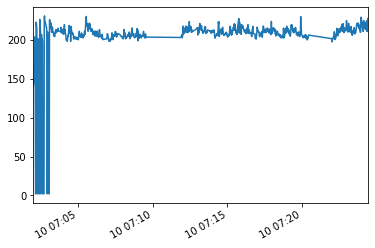

In [11]:
c = next(data['washing machine'].load())[('power','active')][:1024]
l = c.to_numpy()
c.plot()

<AxesSubplot:>

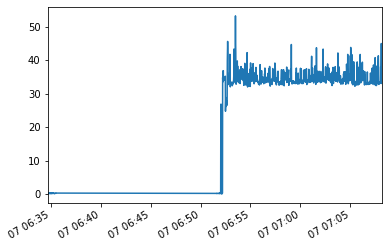

In [12]:
d = next(data['computer'].load())[('power','active')][:1024]
m = d.to_numpy()
d.plot()

<AxesSubplot:>

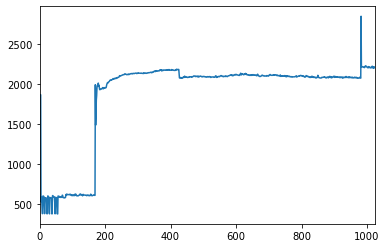

In [15]:
e = j+k+l+m
pd.Series(e).plot()

In [17]:
fft = scipy.fft.fft(e)

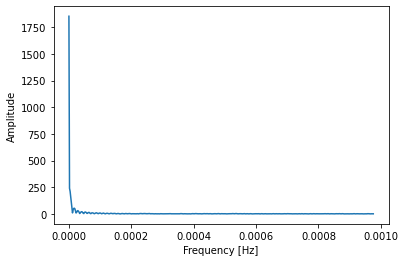

In [18]:
T = 512  # sampling interval 
N = e.size

# 1/T = frequency
f = np.linspace(0, 1 / T, N)

plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(f[:N // 2], np.abs(fft)[:N // 2] * 1 / N)  # 1 / N is a normalization factor
plt.show()

In [22]:
xf = np.linspace(0.0,100,fft.shape[0])

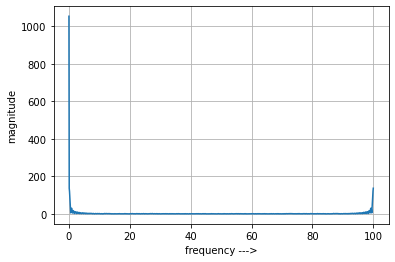

In [24]:
fig,ax = plt.subplots()
ax.plot(xf , 2.0/3600*np.abs(fft))
plt.grid()
plt.xlabel('frequency --->')
plt.ylabel('magnitude')
plt.show()

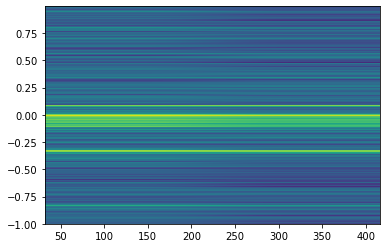

In [25]:
plt.specgram(fft,NFFT = 512);

In [28]:
size = e.size

In [33]:
buffer = 60
counter = 0
li = []
loc = []
mean = 0
for x in range(1024):
    if counter <60:
        li.append(e[x])
        counter +=1
    elif counter == 60:
        li.pop(0)
        li.append(e[x])
        counter=0
        new_list = np.array(li)
        new_mean = (np.mean(new_list))
        if e[x] > (mean + (mean*10/100)):
            name =input('New Device turned ON. Name it:')
            loc.append(x)
        mean = new_mean
print (loc)

New Device turned ON. Name it:
New Device turned ON. Name it:
New Device turned ON. Name it:
New Device turned ON. Name it:
New Device turned ON. Name it:
New Device turned ON. Name it:
New Device turned ON. Name it:
New Device turned ON. Name it:
New Device turned ON. Name it:
New Device turned ON. Name it:
New Device turned ON. Name it:
New Device turned ON. Name it:
New Device turned ON. Name it:
New Device turned ON. Name it:
New Device turned ON. Name it:
[60, 182, 243, 304, 365, 426, 487, 548, 609, 670, 731, 792, 853, 914, 975]


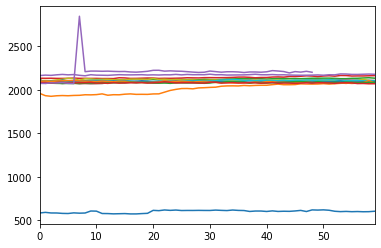

In [35]:
for x in loc:
    pd.Series(e[x:x+60]).plot()